In [1]:
import pandas as pd
import numpy as np


In [10]:
#import csv file

train_df = pd.read_csv('data/asl-signs/train.csv')
train_df.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [3]:
train_df.shape

(94477, 4)

In [4]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id')

,participant_id
sign,
zipper,299
vacuum,307
beside,310
person,312
dance,312
...,...
mouse,408
donkey,410
shhh,411


<AxesSubplot:xlabel='sign'>

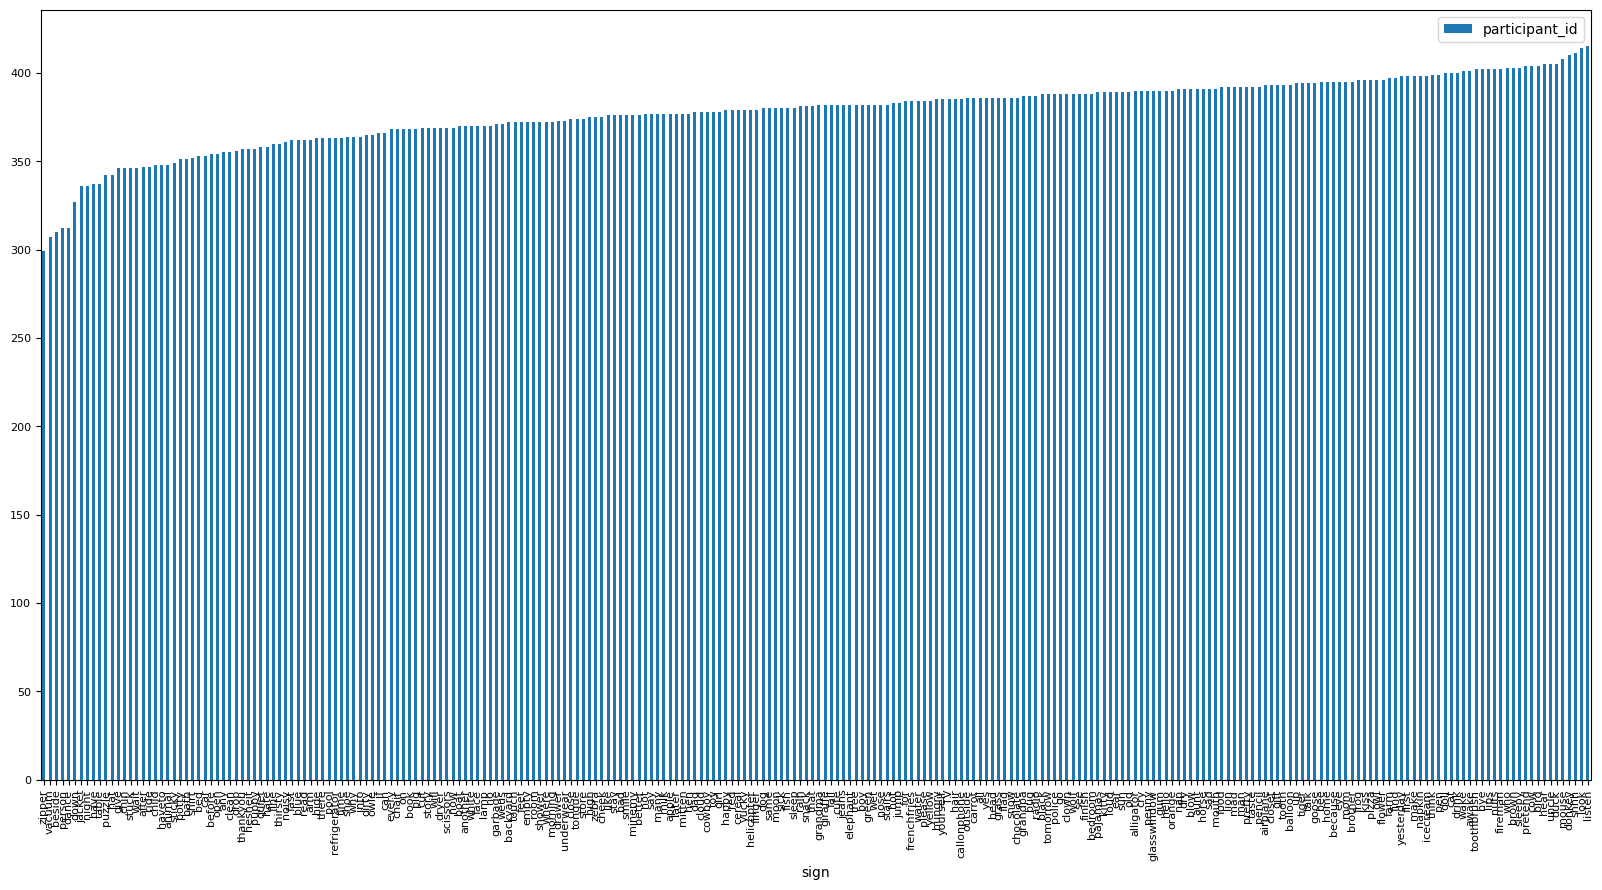

In [11]:
train_df[['sign', 'participant_id']].groupby('sign').count().sort_values(by='participant_id').plot(kind='bar', figsize=(20,10), fontsize=8)

In [6]:
# check for duplicates
train_df.duplicated().sum()

0

In [7]:
train_df[['participant_id', 'sign']].groupby('participant_id').count()

,sign
participant_id,
2044,4810
4718,3499
16069,4848
18796,3502
22343,4677
25571,3865
26734,4841
27610,4275
28656,4563


<AxesSubplot:xlabel='sign'>

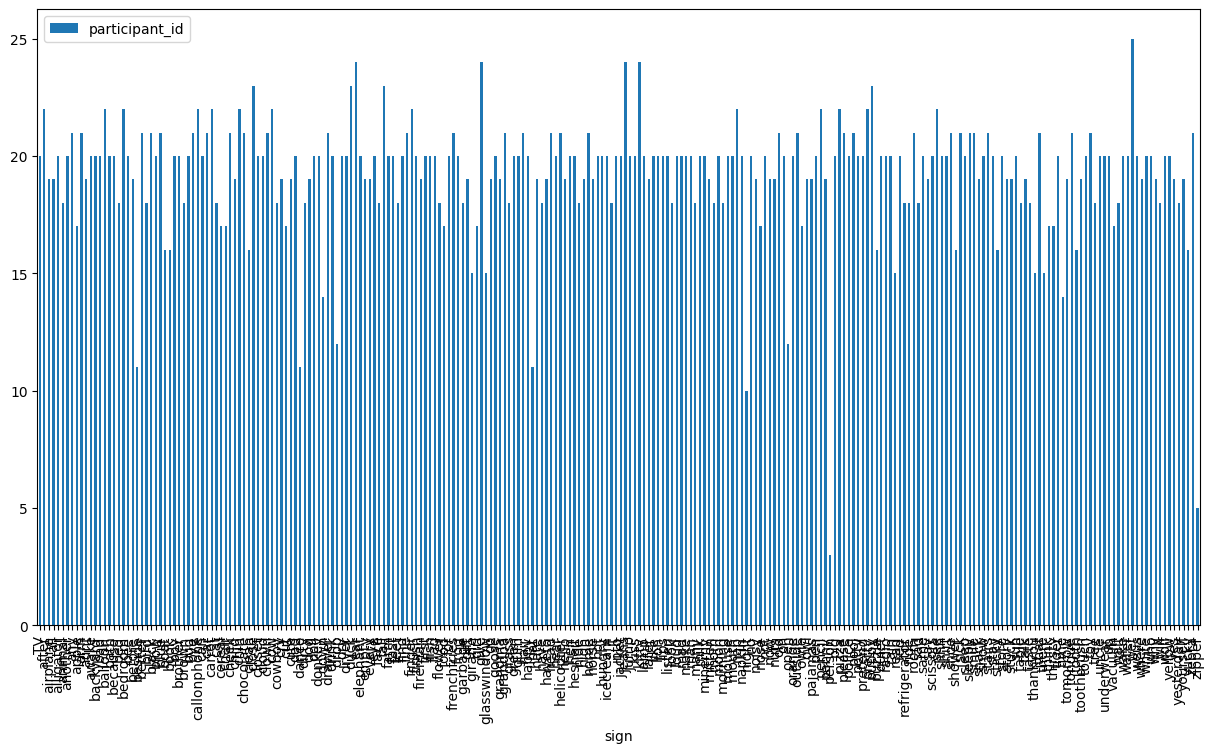

In [8]:
train_df[['participant_id', 'sign']].query('participant_id == 2044').groupby('sign').count().plot(kind='bar', figsize=(15,8))

# Parquet files

In [12]:
df_1 = pd.read_parquet('data/asl-signs/train_landmark_files/16069/1005009451.parquet')
df_1.shape

(13575, 7)

In [13]:
df_1.tail()

,frame,row_id,type,landmark_index,x,y,z
13570,51,51-right_hand-16,right_hand,16,NaN,NaN,NaN
13571,51,51-right_hand-17,right_hand,17,NaN,NaN,NaN
13572,51,51-right_hand-18,right_hand,18,NaN,NaN,NaN
13573,51,51-right_hand-19,right_hand,19,NaN,NaN,NaN
13574,51,51-right_hand-20,right_hand,20,NaN,NaN,NaN


In [14]:
df_1.groupby('type').count()

,frame,row_id,landmark_index,x,y,z
type,,,,,,
face,11700,11700,11700,11700,11700,11700
left_hand,525,525,525,294,294,294
pose,825,825,825,825,825,825
right_hand,525,525,525,0,0,0


In [15]:
# count of landmarks for hand
df_1.groupby(['type', 'landmark_index']).count().query('type == "pose"')

frame  row_id   x   y   z
type landmark_index                           
pose 0                  25      25  25  25  25
     1                  25      25  25  25  25
     2                  25      25  25  25  25
     3                  25      25  25  25  25
     4                  25      25  25  25  25
     5                  25      25  25  25  25
     6                  25      25  25  25  25
     7                  25      25  25  25  25
     8                  25      25  25  25  25
     9                  25      25  25  25  25
     10                 25      25  25  25  25
     11                 25      25  25  25  25
     12                 25      25  25  25  25
     13                 25      25  25  25  25
     14                 25      25  25  25  25
     15                 25      25  25  25  25
     16                 25      25  25  25  25
     17                 25      25  25  25  25
     18                 25      25  25  25  25
     19                 25      25  25  25  25
     20                 25      25  25  25  25
     21                 25      25  25  25  25
     22                 25      25  25  25  25
     23                 25      25  25  25  25
     24                 25      25  25  25  25
     25                 25      25  25  25  25
     26                 25      25  25  25  25
     27                 25      25  25  25  25
     28                 25      25  25  25  25
     29                 25      25  25  25  25
     30                 25      25  25  25  25
     31                 25      25  25  25  25
     32                 25      25  25  25  25

In [16]:
sign_map = {"TV": 0, "after": 1, "airplane": 2, "all": 3, "alligator": 4, "animal": 5, "another": 6, "any": 7, "apple": 8, "arm": 9, "aunt": 10, "awake": 11, "backyard": 12, "bad": 13, "balloon": 14, "bath": 15, "because": 16, "bed": 17, "bedroom": 18, "bee": 19, "before": 20, "beside": 21, "better": 22, "bird": 23, "black": 24, "blow": 25, "blue": 26, "boat": 27, "book": 28, "boy": 29, "brother": 30, "brown": 31, "bug": 32, "bye": 33, "callonphone": 34, "can": 35, "car": 36, "carrot": 37, "cat": 38, "cereal": 39, "chair": 40, "cheek": 41, "child": 42, "chin": 43, "chocolate": 44, "clean": 45, "close": 46, "closet": 47, "cloud": 48, "clown": 49, "cow": 50, "cowboy": 51, "cry": 52, "cut": 53, "cute": 54, "dad": 55, "dance": 56, "dirty": 57, "dog": 58, "doll": 59, "donkey": 60, "down": 61, "drawer": 62, "drink": 63, "drop": 64, "dry": 65, "dryer": 66, "duck": 67, "ear": 68, "elephant": 69, "empty": 70, "every": 71, "eye": 72, "face": 73, "fall": 74, "farm": 75, "fast": 76, "feet": 77, "find": 78, "fine": 79, "finger": 80, "finish": 81, "fireman": 82, "first": 83, "fish": 84, "flag": 85, "flower": 86, "food": 87, "for": 88, "frenchfries": 89, "frog": 90, "garbage": 91, "gift": 92, "giraffe": 93, "girl": 94, "give": 95, "glasswindow": 96, "go": 97, "goose": 98, "grandma": 99, "grandpa": 100, "grass": 101, "green": 102, "gum": 103, "hair": 104, "happy": 105, "hat": 106, "hate": 107, "have": 108, "haveto": 109, "head": 110, "hear": 111, "helicopter": 112, "hello": 113, "hen": 114, "hesheit": 115, "hide": 116, "high": 117, "home": 118, "horse": 119, "hot": 120, "hungry": 121, "icecream": 122, "if": 123, "into": 124, "jacket": 125, "jeans": 126, "jump": 127, "kiss": 128, "kitty": 129, "lamp": 130, "later": 131, "like": 132, "lion": 133, "lips": 134, "listen": 135, "look": 136, "loud": 137, "mad": 138, "make": 139, "man": 140, "many": 141, "milk": 142, "minemy": 143, "mitten": 144, "mom": 145, "moon": 146, "morning": 147, "mouse": 148, "mouth": 149, "nap": 150, "napkin": 151, "night": 152, "no": 153, "noisy": 154, "nose": 155, "not": 156, "now": 157, "nuts": 158, "old": 159, "on": 160, "open": 161, "orange": 162, "outside": 163, "owie": 164, "owl": 165, "pajamas": 166, "pen": 167, "pencil": 168, "penny": 169, "person": 170, "pig": 171, "pizza": 172, "please": 173, "police": 174, "pool": 175, "potty": 176, "pretend": 177, "pretty": 178, "puppy": 179, "puzzle": 180, "quiet": 181, "radio": 182, "rain": 183, "read": 184, "red": 185, "refrigerator": 186, "ride": 187, "room": 188, "sad": 189, "same": 190, "say": 191, "scissors": 192, "see": 193, "shhh": 194, "shirt": 195, "shoe": 196, "shower": 197, "sick": 198, "sleep": 199, "sleepy": 200, "smile": 201, "snack": 202, "snow": 203, "stairs": 204, "stay": 205, "sticky": 206, "store": 207, "story": 208, "stuck": 209, "sun": 210, "table": 211, "talk": 212, "taste": 213, "thankyou": 214, "that": 215, "there": 216, "think": 217, "thirsty": 218, "tiger": 219, "time": 220, "tomorrow": 221, "tongue": 222, "tooth": 223, "toothbrush": 224, "touch": 225, "toy": 226, "tree": 227, "uncle": 228, "underwear": 229, "up": 230, "vacuum": 231, "wait": 232, "wake": 233, "water": 234, "wet": 235, "weus": 236, "where": 237, "white": 238, "who": 239, "why": 240, "will": 241, "wolf": 242, "yellow": 243, "yes": 244, "yesterday": 245, "yourself": 246, "yucky": 247, "zebra": 248, "zipper": 249}

In [17]:
# applying dictionary on sign to create target column
train_df['target'] = train_df.sign.map(sign_map)
train_df.head()

,path,participant_id,sequence_id,sign,target
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164


* Limit data to 2 participants and 5 signs
* Start with hand landmarks
* Next step add more signs/participants
* Next step add pose,
* Next step add face


delete z coordinate



Limit train_df to participants: 16069 & 18796

In [19]:
train_r = train_df.query("participant_id == 16069 or participant_id == 18796")

Limit train_df to signs: 

In [23]:
train_r = train_r.query("sign == 'tiger' or sign == 'pencil' or sign == 'sleepy' or sign == 'grandma' or sign == 'chocolate'")

In [24]:
train_r


,path,participant_id,sequence_id,sign,target
191,train_landmark_files/16069/1007589714.parquet,16069,1007589714,sleepy,200
196,train_landmark_files/18796/1007844942.parquet,18796,1007844942,chocolate,44
244,train_landmark_files/18796/1009688574.parquet,18796,1009688574,tiger,219
285,train_landmark_files/18796/1011866732.parquet,18796,1011866732,grandma,99
291,train_landmark_files/18796/1012095402.parquet,18796,1012095402,chocolate,44
...,...,...,...,...,...
92944,train_landmark_files/16069/936049050.parquet,16069,936049050,pencil,168
93258,train_landmark_files/16069/949444297.parquet,16069,949444297,sleepy,200
93297,train_landmark_files/16069/950785989.parquet,16069,950785989,chocolate,44
93538,train_landmark_files/16069/960149363.parquet,16069,960149363,tiger,219


Load 190 parquet files and put them in one big data frame

In [76]:
df_r = pd.DataFrame() #initialize empty dataframe
#df_r = []

for i in range(len(train_r)):
    p = train_r.iloc[i, 0]
    s = train_r.iloc[i, 3]
    data = pd.read_parquet('data/asl-signs/'+p)
    data['sign'] = s
    df_r = pd.concat([df_r, data], axis = 0)
    

In [77]:
type(df_r)

pandas.core.frame.DataFrame

Check whether it all worked out

In [78]:
df_r.sign.unique()

array(['sleepy', 'chocolate', 'tiger', 'grandma', 'pencil'], dtype=object)

In [79]:
df_r

,frame,row_id,type,landmark_index,x,y,z,sign
0,29,29-face-0,face,0,0.447308,0.374833,-0.050189,sleepy
1,29,29-face-1,face,1,0.429473,0.336631,-0.082731,sleepy
2,29,29-face-2,face,2,0.431335,0.349860,-0.046442,sleepy
3,29,29-face-3,face,3,0.418647,0.301259,-0.059517,sleepy
4,29,29-face-4,face,4,0.429682,0.324856,-0.086751,sleepy
...,...,...,...,...,...,...,...,...
11941,48,48-right_hand-16,right_hand,16,NaN,NaN,NaN,grandma
11942,48,48-right_hand-17,right_hand,17,NaN,NaN,NaN,grandma
11943,48,48-right_hand-18,right_hand,18,NaN,NaN,NaN,grandma
11944,48,48-right_hand-19,right_hand,19,NaN,NaN,NaN,grandma


In [81]:
#drop z
df_r = df_r.drop('z', axis = 1)
df_r

,frame,row_id,type,landmark_index,x,y,sign
0,29,29-face-0,face,0,0.447308,0.374833,sleepy
1,29,29-face-1,face,1,0.429473,0.336631,sleepy
2,29,29-face-2,face,2,0.431335,0.349860,sleepy
3,29,29-face-3,face,3,0.418647,0.301259,sleepy
4,29,29-face-4,face,4,0.429682,0.324856,sleepy
...,...,...,...,...,...,...,...
11941,48,48-right_hand-16,right_hand,16,NaN,NaN,grandma
11942,48,48-right_hand-17,right_hand,17,NaN,NaN,grandma
11943,48,48-right_hand-18,right_hand,18,NaN,NaN,grandma
11944,48,48-right_hand-19,right_hand,19,NaN,NaN,grandma
